In this example, we will train a neural network using sinnn on the Bike Sharing Dataset

In [38]:
!pip install sinnn

In [39]:
import numpy as np
import urllib.request
from numpy import genfromtxt
from sinnn.Model import Model
from sinnn.Layers import Dense, ReLU
from sinnn.Losses import MSE
from sinnn.utils import save_model, load_model

Downloading the dataset

In [40]:
urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip", "Bike-Sharing-Dataset")

('Bike-Sharing-Dataset', <http.client.HTTPMessage at 0x7f63d39ebac8>)

Expanding the dataset

In [41]:
!unzip Bike-Sharing-Dataset


Archive:  Bike-Sharing-Dataset
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


After viewing the csv, we can see that the first row and coloumn (row and colums headings) needs to be removed from the data. We also remove the second column (date) as the year month and day are already available in later coloumns.

In [42]:
bike_data = genfromtxt('hour.csv', delimiter=',')[1:, 2:]

The data is shuffled before partitioning into train and test

In [43]:
np.random.shuffle(bike_data)
x_train, y_train, x_test, y_test = bike_data[:9600, :-1], bike_data[:9600, -1:], bike_data[9600:, :-1], bike_data[9600:, -1:]

A model object in intantiated with MSE loss_function. 
We add a neural network with 100 neurons in the first hidden layer, followed by ReLU, followed by 200 neurons in second hidden layer, again followed by ReLu. The output layer contains just 1 neuron and its activation will predict labels. We train the network over 10 epochs with a batch size of 32.

In [44]:
model = Model(loss_function=MSE())
model.add(Dense(100), ReLU(), Dense(200), ReLU(), Dense(1))
model.train(x_train, y_train, 32, 10, (x_test, y_test))

{'Epochs': 0, 'train_loss': 69387.9892051373, 'validation_loss': 71735.89503205878}
{'Epochs': 1, 'train_loss': 0.14338706155367886, 'validation_loss': 0.14458997274158625}
{'Epochs': 2, 'train_loss': 0.060812382974511504, 'validation_loss': 0.06160691837671004}
{'Epochs': 3, 'train_loss': 0.031050337708793466, 'validation_loss': 0.03156223057181988}
{'Epochs': 4, 'train_loss': 0.01782567683906422, 'validation_loss': 0.018142769425156312}
{'Epochs': 5, 'train_loss': 0.010936234228141372, 'validation_loss': 0.011110760226808956}
{'Epochs': 6, 'train_loss': 0.007236848933563557, 'validation_loss': 0.007330854723268884}
{'Epochs': 7, 'train_loss': 0.005126745418580676, 'validation_loss': 0.005176672322206588}
{'Epochs': 8, 'train_loss': 0.0038213336319642285, 'validation_loss': 0.0038477783243219613}
{'Epochs': 9, 'train_loss': 0.0029834369676421855, 'validation_loss': 0.00299840727107661}
{'Epochs': 10, 'train_loss': 0.00243094787238311, 'validation_loss': 0.002440080854853425}


After training the model we save the model immediately to prevent loss of data.

In [45]:
save_model(model)

Model is loaded and all metrics plotted (For MSE only loss in supported.)

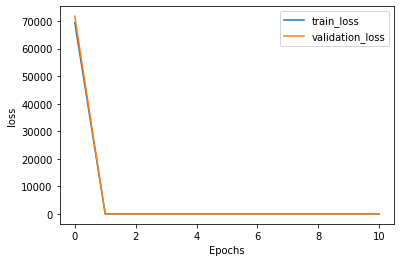

In [46]:
import matplotlib.pyplot as plt

model = load_model()
for metric in model.train_log:
    for key in model.train_log[metric]:
        plt.plot(model.train_log[metric][key], label=key)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.show()